# Student alcohol consumption

Exploratory data analysis of student alcohol consumption daken from: https://www.kaggle.com/uciml/student-alcohol-consumption

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex - student's sex (binary: 'F' - female or 'M' - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime - home to school travel time (numeric: 1 to 14:59 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - more than 1 hour)
* studytime - weekly study time (numeric: 1 to 1:59 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - more than 10 hours)
* failures - number of past class failures (numeric: n if n equal or greater than 1 and less than 3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* nursery - attended nursery school (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

In [1]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 5)

## Math course data

In [2]:
student_mat = pd.read_csv('../data/student-alcohol-consumption/student-mat.csv', low_memory=False)
student_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [3]:
student_mat.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Amount of math students by school

In [4]:
student_mat.groupby('school').size().to_frame('students').sort_values('students', ascending=False)

,students
school,
GP,349
MS,46


## Portuguese course data

In [5]:
student_por = pd.read_csv('../data/student-alcohol-consumption/student-por.csv', low_memory=False)
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [6]:
student_por.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


#### Amount of portuguese students by school

In [7]:
student_por.groupby('school').size().to_frame('students').sort_values('students', ascending=False)

,students
school,
GP,423
MS,226


## Merged data

Combined Data Frame of both courses.

In [8]:
#student_mat = student_mat.assign(course='math')
#student_por = student_mat.assign(course='portuguese')
students = pd.concat([student_mat.assign(course='math'), student_por.assign(course='portuguese')])

Histogram of final grades:

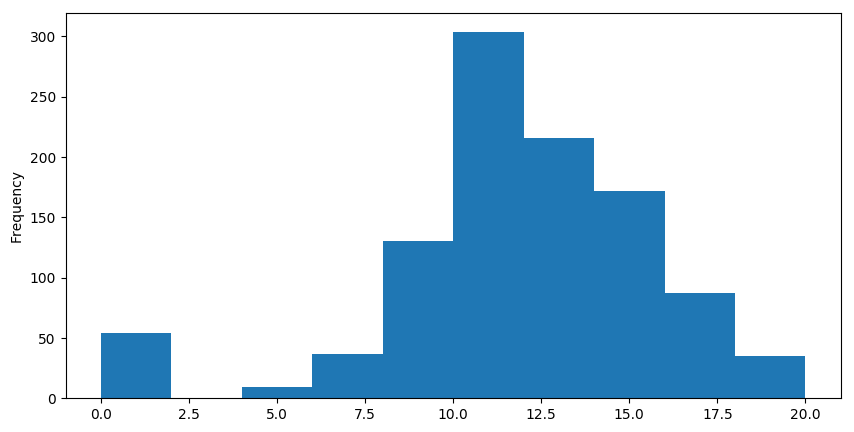

In [9]:
students['G3'].plot.hist()

### Best school

We'll start adding a new column with the average grade of each student.

In [10]:
students = students.assign(averagegrade = (students.G1 + students.G2 + students.G3) / 3)

Now let's see which school has the best average grade:

In [11]:
students.groupby(['school']).mean()['averagegrade']

school
GP    11.558290
MS    10.441176
Name: averagegrade, dtype: float64

The school Mousinho da Silveira has a higher average grade than the school Gabriel Pereira in general. But let's see what happens when we analyze each course separately:

In [12]:
students.loc[students.course == 'math',:].groupby(['school']).mean()['averagegrade']

school
GP    10.737345
MS    10.239130
Name: averagegrade, dtype: float64

In [13]:
students.loc[students.course == 'portuguese',:].groupby(['school']).mean()['averagegrade']

school
GP    12.235619
MS    10.482301
Name: averagegrade, dtype: float64

### Comparison of parent's education level by residence

In [14]:
students.groupby(['address']).mean()['Fedu']

address
R    2.164912
U    2.471673
Name: Fedu, dtype: float64

In [15]:
students.groupby(['address']).mean()['Medu']

address
R    2.273684
U    2.727273
Name: Medu, dtype: float64

The parents of the students who live in urban areas have a higher education level than those who live in rural areas.

### Incluence of alcohol consumption during the weekend on health and study time

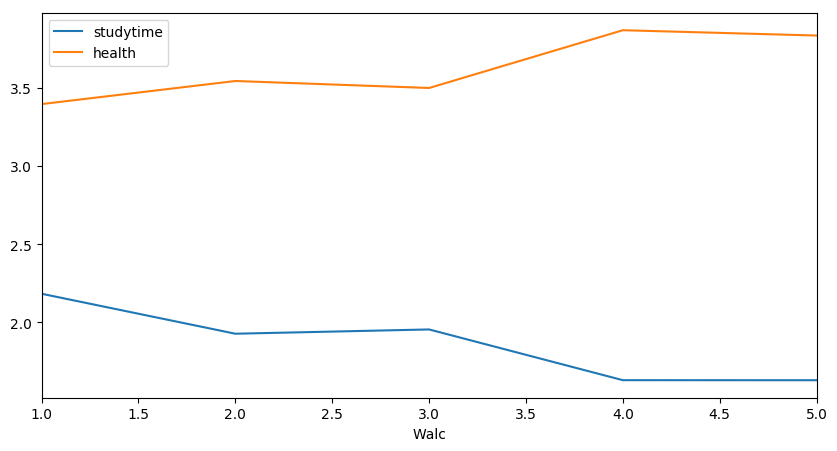

In [16]:
students.loc[:,['Walc','studytime','health']].groupby('Walc').mean().plot()

In [17]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averagegrade
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282,-0.129135
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472,0.226919
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796,0.186610
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627,-0.126157
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629,0.192288
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145,-0.397262
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171,0.036947,0.042054,0.054461,0.047518
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079,-0.051985,-0.068952,-0.064890,-0.065489
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142,-0.101163,-0.108411,-0.097877,-0.107309
Dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867,-0.150943,-0.131576,-0.129642,-0.143283


### Average grade according to the reason of school choice

In [18]:
students.groupby('reason').mean()['averagegrade']

reason
course        10.879070
home          11.338501
other         10.839506
reputation    12.052419
Name: averagegrade, dtype: float64

### Average grade according to Internet access

In [19]:
students.groupby('internet').mean()['averagegrade']

internet
no     10.533026
yes    11.459895
Name: averagegrade, dtype: float64

### Influence of relationship status on alcohol consumption

In [20]:
students.groupby('romantic').mean()['Dalc']

romantic
no     1.463596
yes    1.549865
Name: Dalc, dtype: float64

In [21]:
students.groupby('romantic').mean()['Walc']

romantic
no     2.300149
yes    2.256065
Name: Walc, dtype: float64